In [48]:
import pandas as pd
from pathlib import Path
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

sns.set_theme(rc={"figure.dpi": 150})


# Make Matplotlib plots appear inline
%matplotlib inline

results = Path('./results')

def plot_unity(xdata, ydata, **kwargs):
    mn = min(xdata.min(), ydata.min())
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

In [49]:
manu_quality_benchmarks = pd.read_csv(results / 'manu_quality_benchmarks.csv')
auto_quality_benchmarks = pd.read_csv(results / 'auto_quality_benchmarks.csv')
manu_runtime_benchmarks = pd.read_csv(results / 'manu_runtime_benchmarks.csv')
auto_runtime_benchmarks = pd.read_csv(results / 'auto_runtime_benchmarks.csv')

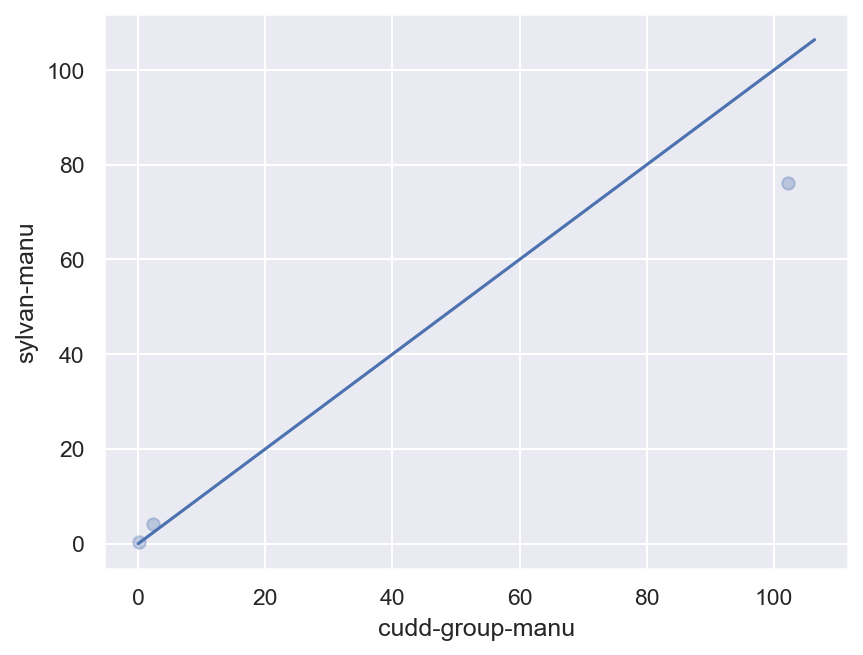

In [88]:
TRIGGER = "manu"
GOAL = "runtime"

if GOAL == "quality":
    target = "time"
else:
    target = "mean"
    
benchmark = pd.read_csv(results / f"{TRIGGER}_{GOAL}_benchmarks.csv")

a_name = f"cudd-sift-{TRIGGER}"
b_name = f"cudd-group-{TRIGGER}"
c_name = f"sylvan-{TRIGGER}"

a = benchmark[benchmark['solver'] == a_name]
b = benchmark[benchmark['solver'] == b_name]
c = benchmark[benchmark['solver'] == c_name]

my_max = max(max(a[target]), max(b[target]))

plt.scatter(b[target], c[target], alpha=0.3)
plt.xlabel(b_name)
plt.ylabel(c_name)
plt.plot([0, my_max],[0, my_max])
plt.show()

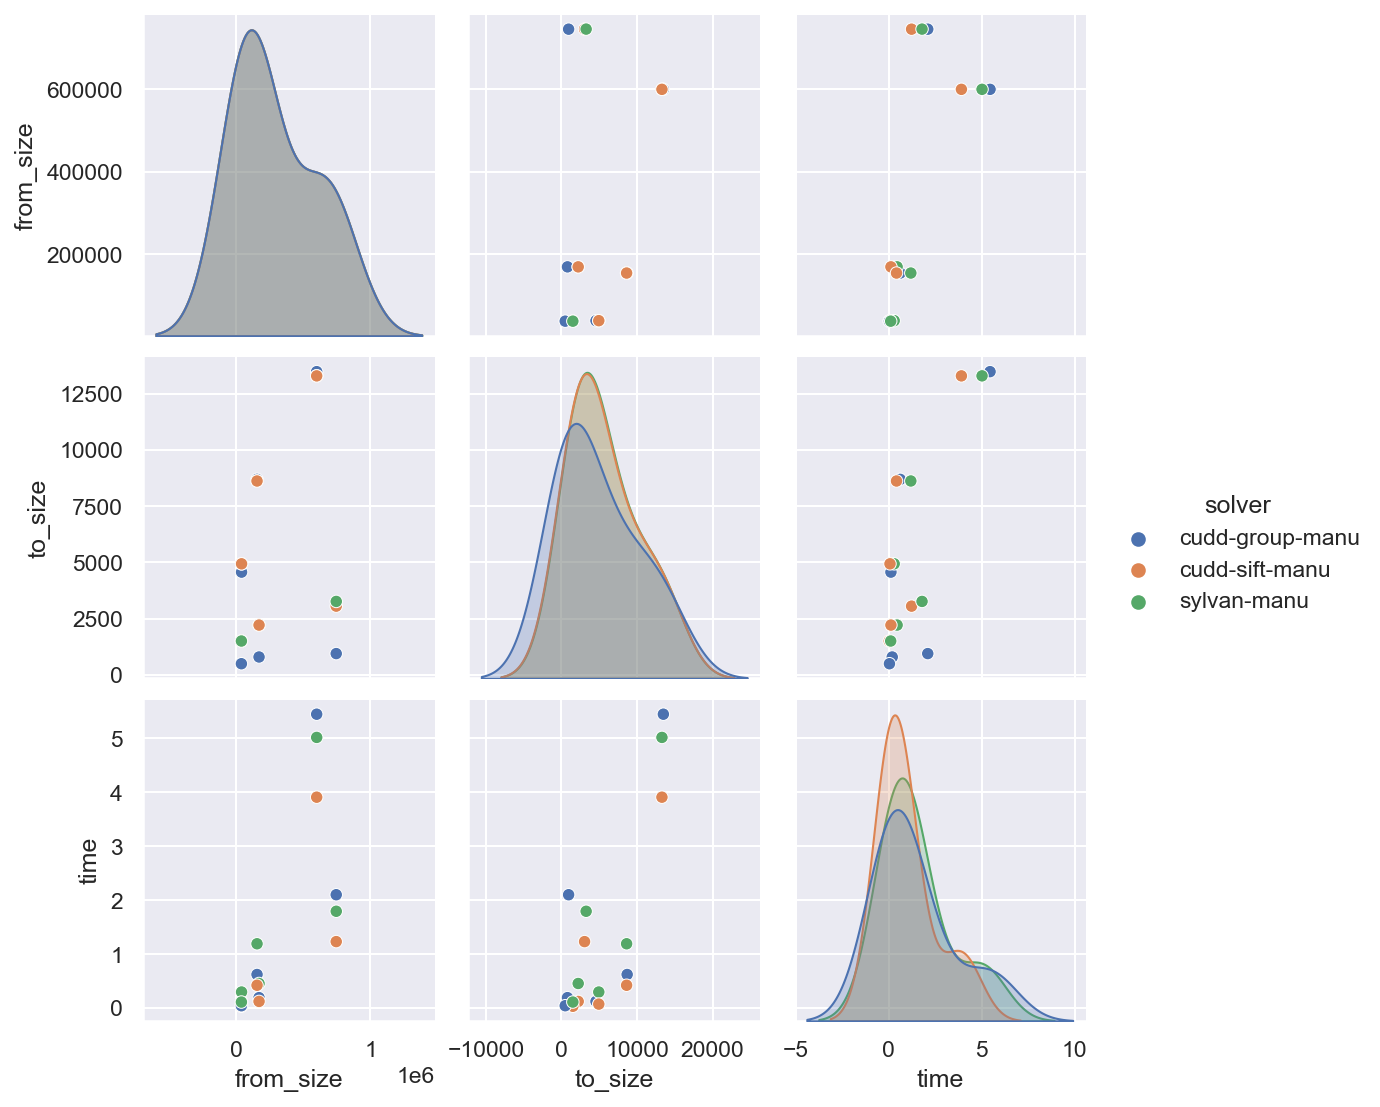

In [63]:
sns.pairplot(manu_quality_benchmarks, hue="solver", height=2.5)

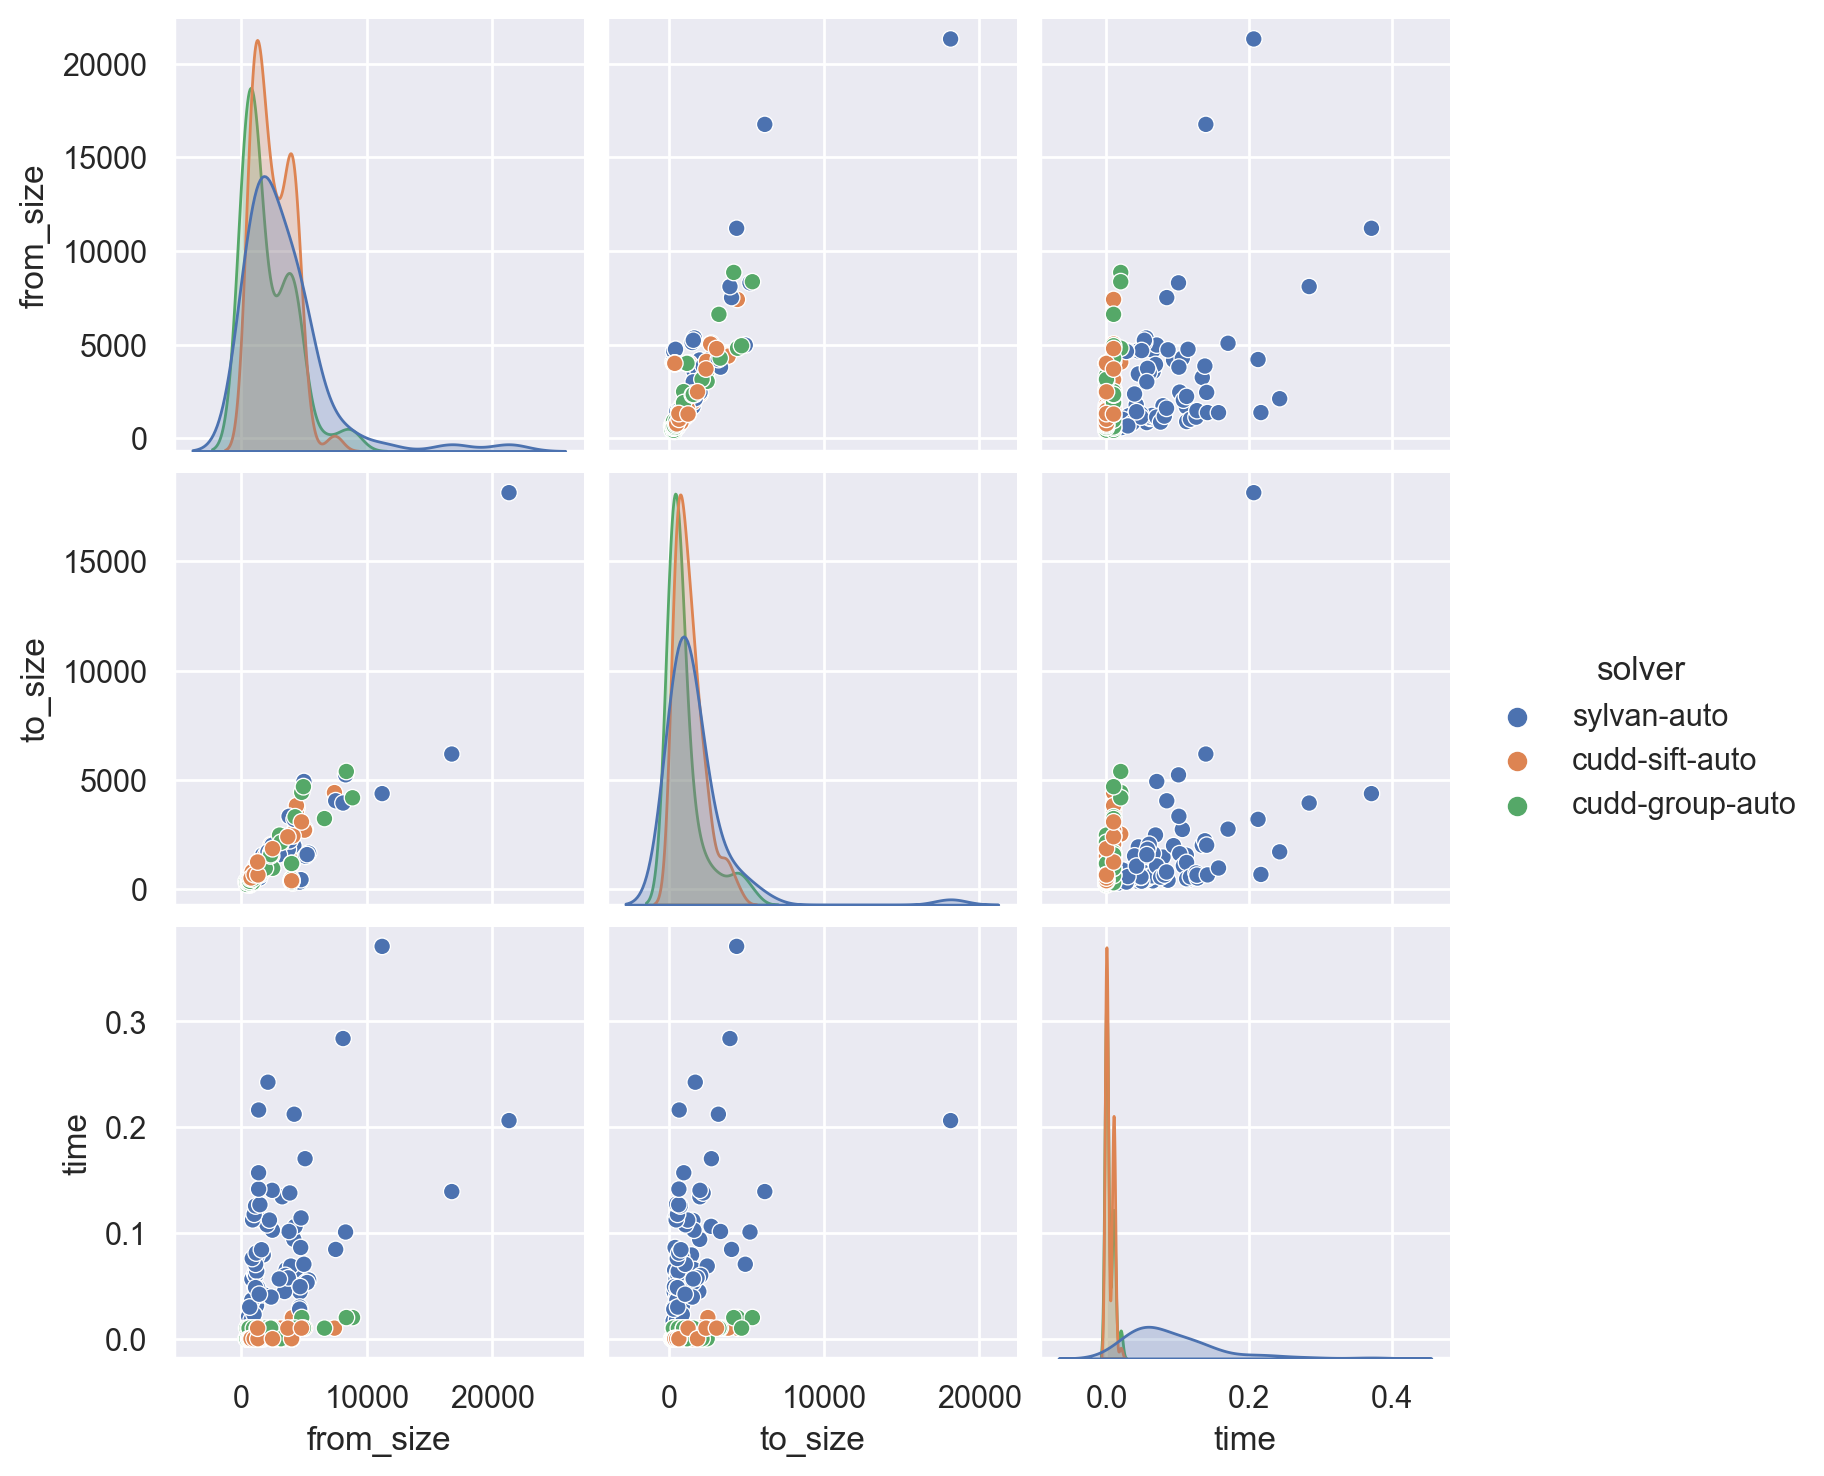

In [33]:
sns.pairplot(auto_quality_benchmarks, hue="solver", height=2.5)

In [34]:
# filter out cudd-group-auto sovler
manu_quality_benchmarks = manu_quality_benchmarks[manu_quality_benchmarks['solver'] != 'cudd-group-manu']
manu_quality_benchmarks.head()

,from_size,to_size,time,solver,model
3,744993,3060,1.230000,cudd-sift-manu,add14y.aag
5,169619,2219,0.452766,sylvan-manu,add12y.aag
6,169619,2219,0.120000,cudd-sift-manu,add12y.aag
8,745166,3270,1.793081,sylvan-manu,add14y.aag
9,38133,1510,0.030000,cudd-sift-manu,add10y.aag


In [35]:
auto_quality_benchmarks = auto_quality_benchmarks[auto_quality_benchmarks['solver'] != 'cudd-group-auto']
auto_quality_benchmarks.head()

,from_size,to_size,time,solver,model
0,4105,280,0.016813,sylvan-auto,add10y.aag
1,574,531,0.021127,sylvan-auto,add10y.aag
2,1206,882,0.031371,sylvan-auto,add10y.aag
3,1787,1248,0.041668,sylvan-auto,add10y.aag
4,4001,373,0.000000,cudd-sift-auto,add16y.aag
